In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel("/content/drive/MyDrive/data-06-PG.xls")

In [3]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01 00:00:00,Salaried,2018-03-08 00:00:00,6,1998,1,1,0,0,0,0,0,No History,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,2018-01-08 00:00:00,6,1998,1,1,0,0,0,0,0,No History,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12 00:00:00,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No History,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [5]:
datanew=data.drop(['UniqueID','branch_id','supplier_id','manufacturer_id','Current_pincode_ID','Date.of.Birth','DisbursalDate','State_ID','Employee_code_ID','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],axis=1)

In [6]:
datanew.describe()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,loan_default
count,65535.000000,65535.000000,65535.000000,65535.0,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,6.553500e+04,6.553500e+04,6.553500e+04,65535.000000,65535.000000,65535.000000,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,65535.000000,65535.000000,65535.000000,65535.000000
mean,53726.987961,75882.391684,73.890214,1.0,0.820523,0.075441,0.165713,0.025208,0.002487,284.106706,2.252567,0.967910,0.141497,1.543081e+05,1.973835e+05,1.972576e+05,0.056046,0.026505,0.007797,6.256708e+03,7.488471e+03,7.377916e+03,9.291863e+03,202.034424,0.358053,0.088457,0.202411
std,12142.777363,17435.491746,11.747705,0.0,0.383754,0.264103,0.371826,0.156757,0.049810,340.332582,4.757031,1.829544,0.521911,1.010312e+06,1.186796e+06,1.202064e+06,0.643050,0.322571,0.119830,2.463340e+05,2.262638e+05,2.257475e+05,1.113889e+05,6820.941204,0.912299,0.361755,0.401800
min,13369.000000,38500.000000,10.030000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.397820e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,46749.000000,66166.000000,67.670000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53303.000000,71260.000000,75.740000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,59713.000000,79119.000000,83.010000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,680.000000,2.000000,1.000000,0.000000,2.632450e+04,5.264150e+04,5.120400e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.733000e+03,0.000000,0.000000,0.000000,0.000000
max,166972.000000,264500.000000,95.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,271.000000,65.000000,18.000000,9.652492e+07,1.058657e+08,1.057557e+08,46.000000,26.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,1.551855e+07,756677.000000,35.000000,8.000000,1.000000


<Figure size 7200x1080 with 0 Axes>

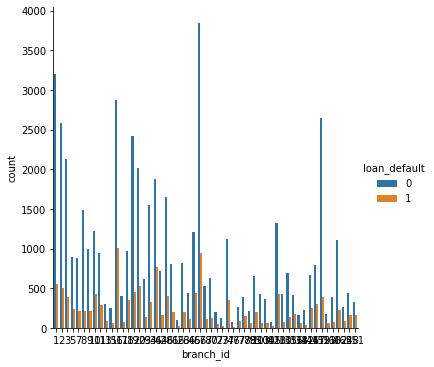

In [7]:
import warnings
warnings.filterwarnings(action='ignore')
fig=plt.figure()
fig.set_size_inches(100,15)
sns.catplot('branch_id',hue='loan_default',data=data,kind='count')
fig.set_size_inches(100,15)

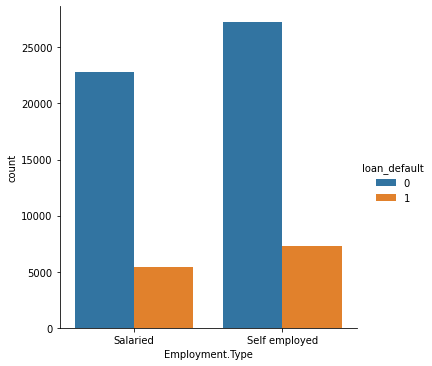

In [8]:
sns.catplot('Employment.Type',hue='loan_default',data=data,kind='count')

In [9]:
datanew.isnull().sum()


disbursed_amount                          0
asset_cost                                0
ltv                                       0
Employment.Type                        2658
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
SEC.NO.OF.ACCTS                           0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
SEC.CURRENT.BALANCE                       0
SEC.SANCTIONED.AMOUNT           

In [10]:
mod=datanew['Employment.Type'].mode()
mod=mod[0]

In [11]:
datanew['Employment.Type']=data['Employment.Type'].fillna(mod)

In [12]:
datanew.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
Employment.Type                        0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.A

In [13]:
datanew['Employment.Type'].value_counts()

Self employed    37242
Salaried         28293
Name: Employment.Type, dtype: int64

In [14]:
datanew.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,loan_default
0,50578,58400,89.55,Salaried,1,1,0,0,0,0,0,No History,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,Self employed,1,1,0,0,0,0,598,Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1
2,53278,61360,89.63,Self employed,1,1,0,0,0,0,0,No History,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,Self employed,1,1,0,0,0,0,305,Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1
4,52378,60300,88.39,Self employed,1,1,0,0,0,0,0,No History,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
print(datanew['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts(),datanew['Employment.Type'].value_counts())

No History        37419
Very Low Risk     14573
Low Risk           3316
Medium Risk        3226
High Risk          3048
Very High Risk     2352
 Low Risk          1601
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64 Self employed    37242
Salaried         28293
Name: Employment.Type, dtype: int64


In [16]:
datanew.shape

(65535, 29)

In [17]:
datanew['Employment.Type']=pd.get_dummies(datanew['Employment.Type'],drop_first=True)


In [18]:
PERFORM_CNS=pd.get_dummies(datanew['PERFORM_CNS.SCORE.DESCRIPTION'],drop_first=True)

In [19]:
data_new=pd.concat([datanew,PERFORM_CNS],axis='columns')

In [20]:
data_new=data_new.drop('PERFORM_CNS.SCORE.DESCRIPTION',axis=1)

In [21]:
data_new.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,loan_default,High Risk,Low Risk,Medium Risk,No History,Very High Risk,Very Low Risk
0,50578,58400,89.55,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,47145,65550,73.23,1,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,0,0,1,0,0,0
2,53278,61360,89.63,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,57513,66113,88.48,1,1,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,0,0,0,0,1,0
4,52378,60300,88.39,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [22]:
import random

In [23]:
data_random=data_new.sample(2000)

In [24]:
x=data_random.drop(['loan_default'],axis=1)
y=data_random['loan_default']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train)
x_test_new=sc.transform(x_test)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [28]:
model_new_svm=GridSearchCV(svm.SVC(gamma='auto'),{'C':[1,20,40],'kernel':['rbf','linear']},cv=5,return_train_score=False)
model_new_svm.fit(x_train_new,y_train)
model_new_svm.cv_results_

{'mean_fit_time': array([ 0.08688974,  0.34353404,  0.16243248,  3.54594331,  0.20110221,
        49.16847134]),
 'mean_score_time': array([0.01292505, 0.00667419, 0.01201372, 0.00771642, 0.01172619,
        0.0074563 ]),
 'mean_test_score': array([0.798     , 0.798     , 0.77333333, 0.798     , 0.76333333,
        0.798     ]),
 'param_C': masked_array(data=[1, 1, 20, 20, 40, 40],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 40, 'kernel': 'rbf'},
  {'C': 40, 'kernel': 'linear'}],
 'rank_test_score': array([1, 1, 5, 1, 6, 1], dtype=int32),
 'split0_test_score': array([0.8       

In [29]:
df=pd.DataFrame(model_new_svm.cv_results_)
tabel=df[['params','mean_test_score']]
tabel

,params,mean_test_score
0,"{'C': 1, 'kernel': 'rbf'}",0.798000
1,"{'C': 1, 'kernel': 'linear'}",0.798000
2,"{'C': 20, 'kernel': 'rbf'}",0.773333
3,"{'C': 20, 'kernel': 'linear'}",0.798000
4,"{'C': 40, 'kernel': 'rbf'}",0.763333
5,"{'C': 40, 'kernel': 'linear'}",0.798000


In [30]:
model_final=svm.SVC(kernel='rbf',C=1,gamma='auto')
model_final.fit(x_train_new,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred=model_final.predict(x_test_new)

In [32]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[406,   0],
       [ 93,   1]])

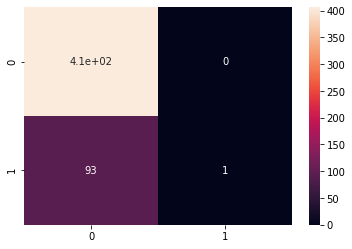

In [33]:
sns.heatmap(cm,annot=True)

In [38]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       406
           1       1.00      0.01      0.02        94

    accuracy                           0.81       500
   macro avg       0.91      0.51      0.46       500
weighted avg       0.85      0.81      0.73       500



In [39]:
import pickle
save_model=pickle.dumps(model_final)